In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  


In [6]:
# Load the dataset
file_path = r"C:\Users\kanak mishra\Downloads\archive (1)\Walmart_Sales.csv"  
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


0

In [14]:
# Convert 'Date' column to datetime format, handling errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if any invalid dates were converted to NaT (Not a Time)
invalid_dates = df[df['Date'].isna()]
print("Rows with invalid dates:", invalid_dates)

# Drop or fill missing dates if necessary
df.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates
# df['Date'].fillna(method='ffill', inplace=True)  # Alternative: Fill missing dates

# Extract additional time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# Check the changes
df.head()


Rows with invalid dates:       Store Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2         1  NaT    1611968.17             0        39.93       2.514   
3         1  NaT    1409727.59             0        46.63       2.561   
6         1  NaT    1472515.79             0        54.58       2.720   
7         1  NaT    1404429.92             0        51.45       2.732   
10        1  NaT    1466058.28             0        66.32       2.808   
...     ...  ...           ...           ...          ...         ...   
6428     45  NaT     702238.27             0        67.87       3.948   
6429     45  NaT     723086.20             0        65.32       4.038   
6430     45  NaT     713173.95             0        64.88       3.997   
6433     45  NaT     718125.53             0        56.47       3.969   
6434     45  NaT     760281.43             0        58.85       3.882   

             CPI  Unemployment  
2     211.289143         8.106  
3     211.319643         8.106  

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Thursday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,Monday
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,3,Friday
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,4,Thursday


In [16]:
# Display summary statistics
df.describe()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,2565.000000,2565,2.565000e+03,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000,2565.000000
mean,23.000000,2011-05-29 11:47:22.105263104,1.059872e+06,0.105263,59.585864,3.329579,171.386349,8.022267,2010.929825,6.561404,6.491228
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.513000,126.085452,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,2010-10-09 00:00:00,5.700695e+05,0.000000,45.260000,2.868000,131.586613,6.908000,2010.000000,4.000000,4.000000
50%,23.000000,2011-05-08 00:00:00,9.813452e+05,0.000000,61.100000,3.417000,182.598306,7.907000,2011.000000,6.000000,6.000000
75%,34.000000,2012-02-03 00:00:00,1.450733e+06,0.000000,74.570000,3.702000,212.512605,8.622000,2012.000000,10.000000,9.000000
max,45.000000,2012-12-10 00:00:00,2.752122e+06,1.000000,100.070000,4.468000,227.169392,14.313000,2012.000000,12.000000,12.000000
std,12.989706,NaN,5.573831e+05,0.306952,19.069276,0.461985,39.293112,1.878158,0.791769,3.459797,3.256522


        Date
0 2010-05-02
1 2010-12-02
4 2010-05-03
5 2010-12-03
8 2010-02-04


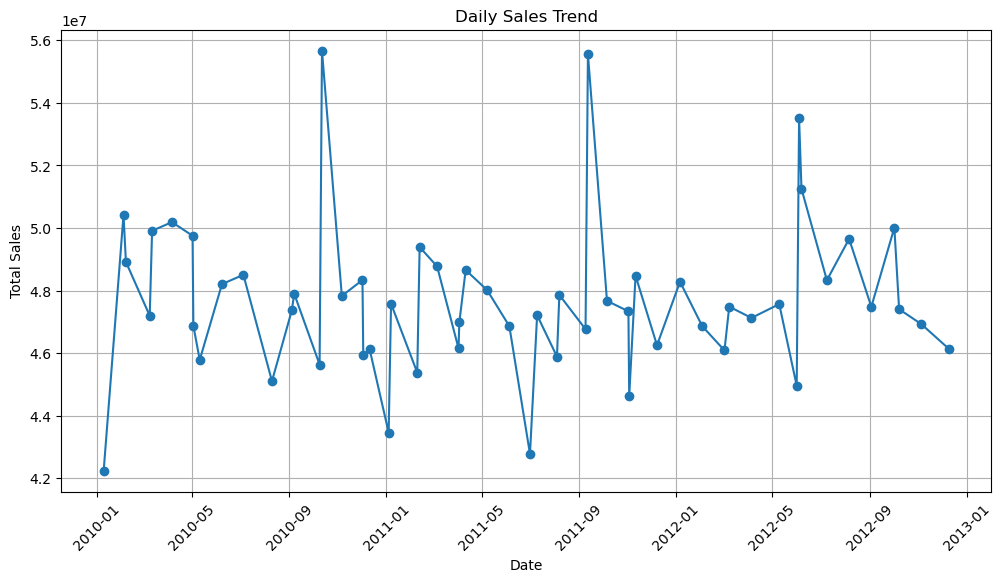

In [20]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Check if conversion was successful
print(df[['Date']].head())

# Group by Date and sum Weekly Sales
daily_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o', linestyle='-')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()


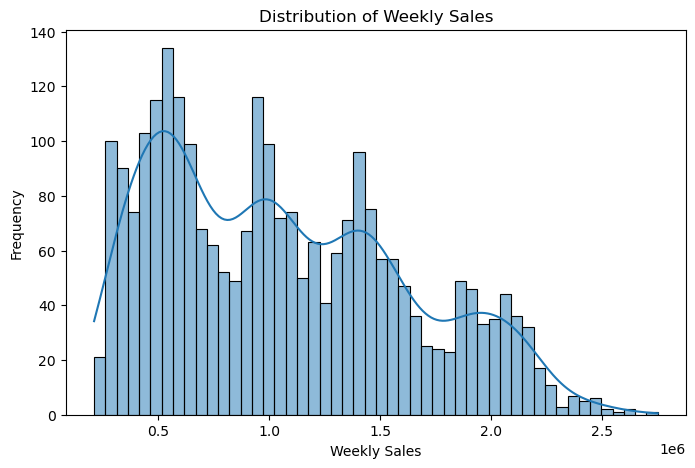

In [22]:
import seaborn as sns

# Histogram of Weekly Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


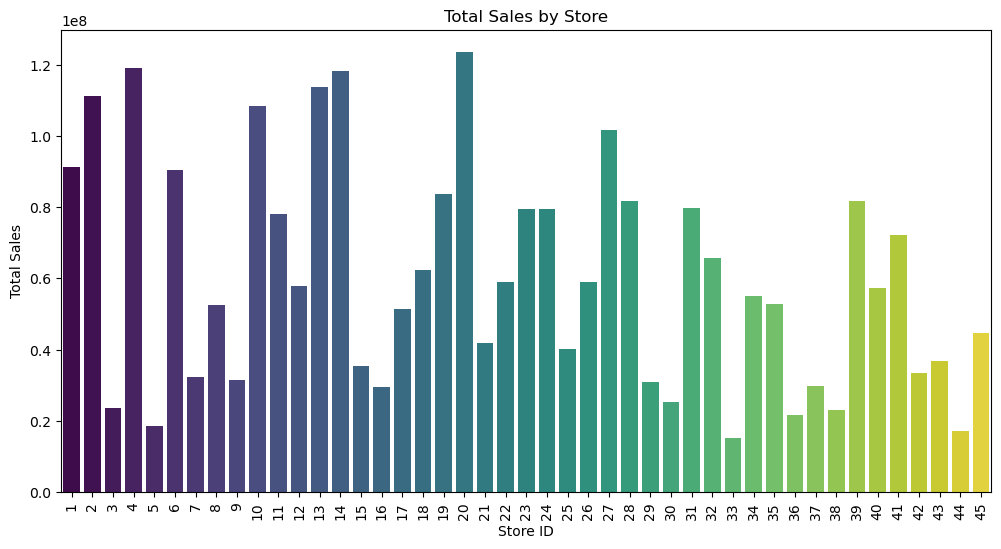

In [30]:
# Aggregate sales by store
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

# Bar Plot of Total Sales by Store
plt.figure(figsize=(12, 6))
sns.barplot(x=store_sales.index, y=store_sales.values,hue=store_sales.index, palette="viridis",legend=False)
plt.title("Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


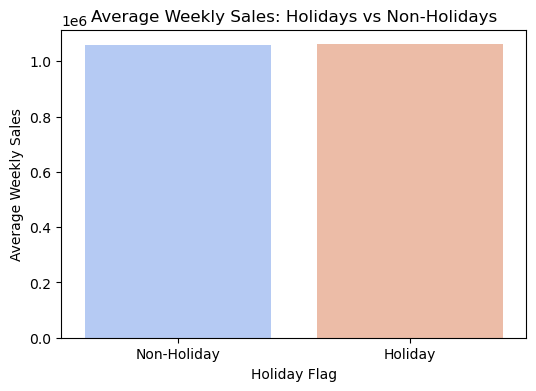

In [32]:
# Compare sales on holiday weeks vs non-holiday weeks
holiday_sales = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values,hue=holiday_sales.index, palette="coolwarm",legend=False)
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.title("Average Weekly Sales: Holidays vs Non-Holidays")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Weekly Sales")
plt.show()


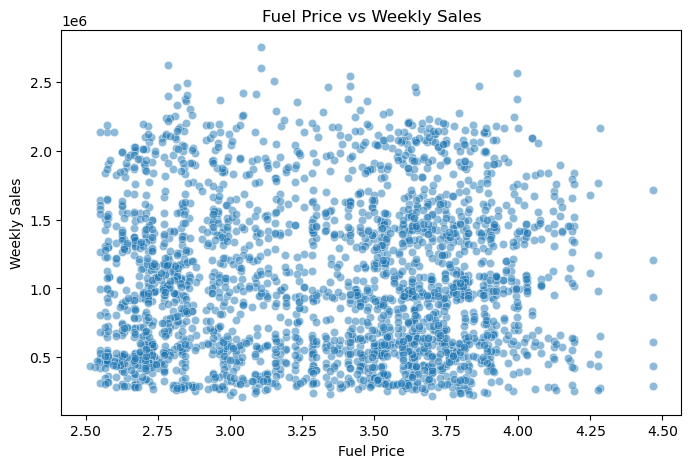

In [28]:
# Scatter plot of Fuel Price vs Weekly Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Fuel_Price"], y=df["Weekly_Sales"], alpha=0.5)
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()


In [34]:
df.to_excel("cleaned_walmart_sales.xlsx", index=False)
